## **Discriminante lineal**

El objetivo del análisis discriminante lineal, LDA (también conocido como LDA de Fisher) es utilizar hiperplanos para separar los datos que representan las diferentes clases [1]. Para un problema de dos clases, la clase de un patrón de características depende de qué lado del hiperplano se encuentre el patrón (ver Figura).

<pre>
<center><img src="https://drive.google.com/uc?export=view&id=1mhK9mJL4tL5Uca_255YOV9daTnkM1Ex_" width=450></center>
</pre>

Técnicamente el LDA asume que los atributos son variables continuas con distribución normal, con matrices de covarianza iguales para ambas clases. El hiperplano de separación se obtiene buscando la proyección que maximice la distancia entre las medias de las dos clases y minimice la varianza dentro de las clases.  Para resolver un problema de N clases (N > 2), se utilizan varios hiperplanos. La estrategia que se utiliza comunmente es "Uno contra el Resto" OVR (One versus rest), que consiste en separar cada clase de todas las demás.

[1] R. O. Duda, P. E. Hart, and D. G. Stork. Pattern Recognition, second edition. WILEYINTERSCIENCE, 2001.

El LDA intenta reducir las dimensiones del conjunto de características conservando la información que discrimina las clases. El LDA proyecta los puntos de datos en nuevas dimensiones de forma que las clases resultantes estén lo más separadas posible entre sí (máxima distancia de las medias interclase) y los elementos individuales dentro de una agrupación estén lo más cerca posible del centro de la clase (mínima varianza intraclase). Estas nuevas dimensiones forman los discriminantes lineales del conjunto de características.

En la práctica, se debe diferenciar el LDA del Análisis de Componentes Principales o PCA (principal component analysis) cuyo objetivo es reducir la dimensión del conjunto de datos buscando uno nuevo con características que sean combinación lineal de las originales y que conserven la mayor cantidad de información posible. En un conjunto de características grande, pueden existir muchas características que sean simplemente duplicados de otras o tengan una alta correlación con las otras características. Tales características son básicamente redundantes y pueden ser ignoradas. El objetivo de aplicar PCA es encontrar estas características altamente correlacionadas o duplicadas y generar un nuevo conjunto de características en el cual exista una correlación mínima entre las mismas, o en otras palabras, un conjunto de características con la máxima variabilidad entre ellas. Dado que esta variabilidad no depende de la salida, el PCA no tiene en cuenta las etiquetas de salida.

LDA, al contrario de PCA es un método supervisado.

## LDA con 4 características

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importamos los datos

In [2]:
iris_df = pd.read_csv("data/iris.csv", index_col=0)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Preprocesamiento de los datos

In [3]:
caracteristicas = iris_df.iloc[:, :4]
target = iris_df.iloc[:, 4]
target = target.map({'setosa':0, 'versicolor':1, 'virginica':2})

En esta ocasión no vamos a separar en datos de entrenamiento y validación por ser un ejemplo simple, pero no olvidar ese paso!!

### Escalado de las características

In [4]:
from sklearn.preprocessing import StandardScaler

X = caracteristicas.copy()
y = target.copy()

sc = StandardScaler()
X_sc = sc.fit_transform(X)

### Aplicamos el análisis discriminante lineal

`n_components` indica el número de discriminantes lineales que se busca. En LDA este número puede ser como máximo $c-1$ donde $c$ es el número de las etiquetas de clase.

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_sc, y)

LinearDiscriminantAnalysis(n_components=2)

### Coeficientes de los hiperplanos de separación

In [6]:
lda.coef_
w = lda.coef_
w

array([[  5.21157831,   5.27345252, -29.81560843, -15.77885735],
       [ -1.26370067,  -1.90100128,   8.26157263,   2.32662354],
       [ -3.94787765,  -3.37245124,  21.5540358 ,  13.45223381]])

In [7]:
w0 = lda.intercept_
w0

array([-30.05954172,  -3.02893404, -17.94902186])

### Matriz de transformación

Corresponde a la matriz que obtiene el método para convertir nuestros datos de 4 características a 2, es decir para hacer la proyección de $\mathbb{R}^4$ a $\mathbb{R}^2$.

In [8]:
matriz_transformacion = lda.scalings_
matriz_transformacion

array([[ 0.68448644, -0.01989153],
       [ 0.66659193, -0.94029176],
       [-3.87282074,  1.63962597],
       [-2.13508598, -2.15691008]])

Vamos a comparar la transformación de los datos con esta matriz, con el resultado obtenido al usar `lda.transform()`, deberíamos obtener la misma proyección de los datos.

In [9]:
X_transformado = np.dot(X_sc, matriz_transformacion)
X_transformado.shape

(150, 2)

In [10]:
label_dict = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}

def plot_data(X, title):

        ax = plt.subplot(111)
        for label,marker,color in zip(range(0,3),('^', 's', 'o'),('blue', 'red', 'green')):

                plt.scatter(x=X[:,0][y == label],
                                y=X[:,1][y == label],
                                marker=marker,
                                color=color,
                                alpha=0.5,
                                label=label_dict[label])


        leg = plt.legend(loc='upper right', fancybox=True)
        leg.get_frame().set_alpha(0.5)
        plt.title(title)

        # hide axis ticks
        plt.tick_params(axis="both", which="both", bottom="off", top="off",
                labelbottom="on", left="off", right="off", labelleft="on")

        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["left"].set_visible(False)

        plt.grid()
        plt.tight_layout
        plt.show()

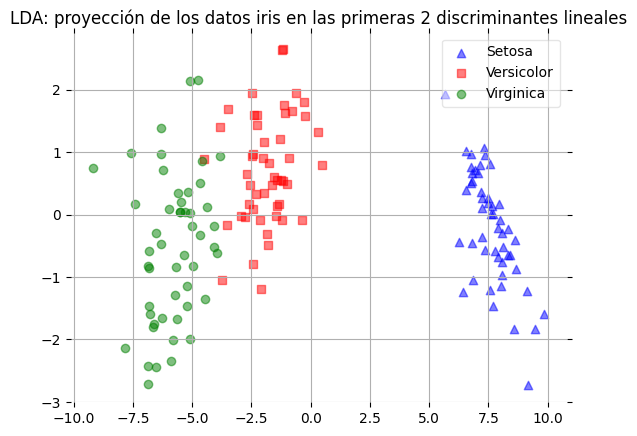

In [11]:
plot_data(X_transformado, "LDA: proyección de los datos iris en las primeras 2 discriminantes lineales")

In [12]:
X_sc.shape

(150, 4)

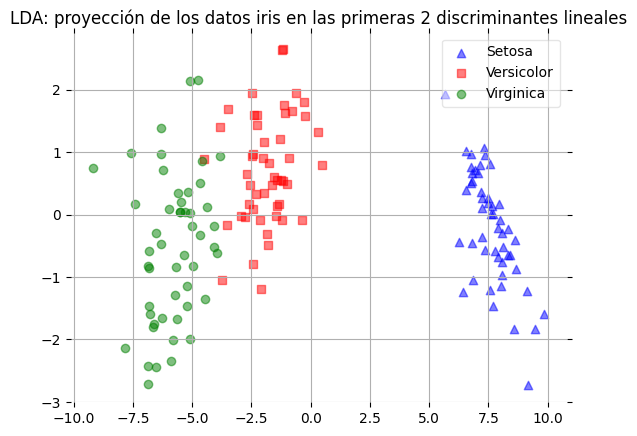

In [13]:
X_lda = lda.transform(X_sc)

plot_data(X_lda, "LDA: proyección de los datos iris en las primeras 2 discriminantes lineales")

In [14]:
lda.predict(X_sc[70:80,:])

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## LDA con 2 características

En este caso seleccionaremos 2 características para poder graficar regiones de separación entre las clases

In [15]:
X = np.array(caracteristicas.copy())
y = np.array(target.copy())

### Visualización usando histogramas

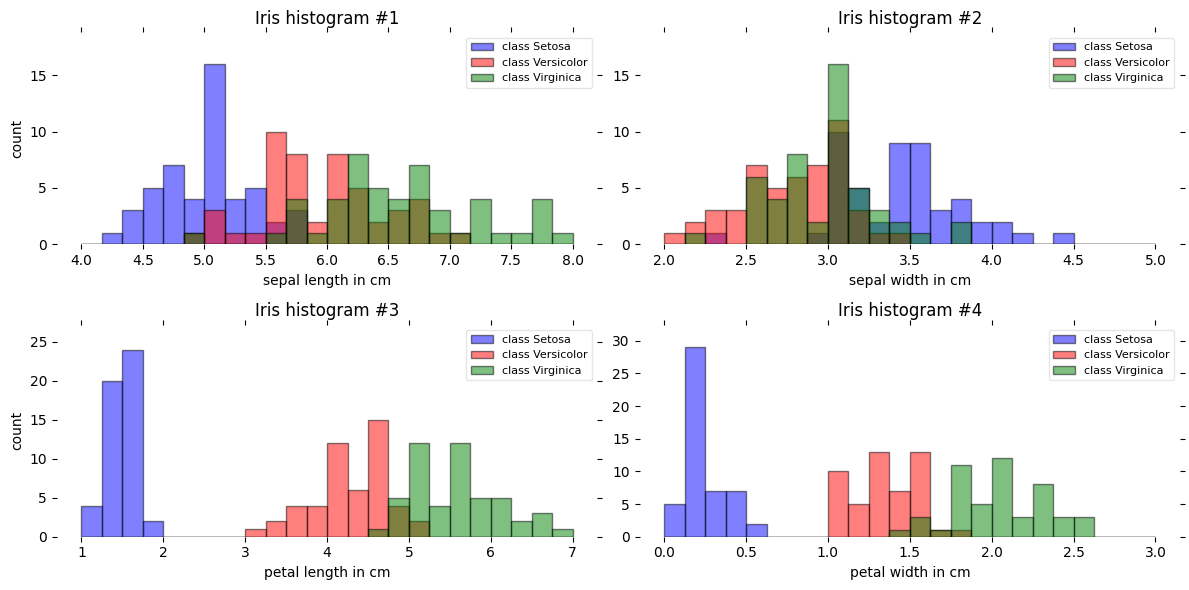

In [16]:
import math

label_dict = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}


feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

for ax,cnt in zip(axes.ravel(), range(4)):
    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # histogramas
    for lab,col in zip(range(0,3), ('blue', 'red', 'green')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label= f'class {label_dict[lab]}',
                   bins=bins,
                   edgecolor='k',
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # Texto
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title(f'Iris histogram #{str(cnt+1)}')
    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()

plt.show()


In [17]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
X = X[:, 2:4]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [19]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_sc, y)

LinearDiscriminantAnalysis(n_components=2)

In [20]:
lda.scalings_

array([[ 2.71717179, -3.80246339],
       [ 1.8250813 ,  3.83082541]])

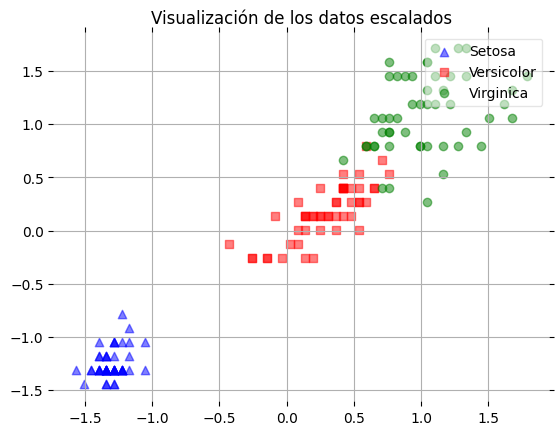

In [21]:
plot_data(X_sc, "Visualización de los datos escalados")

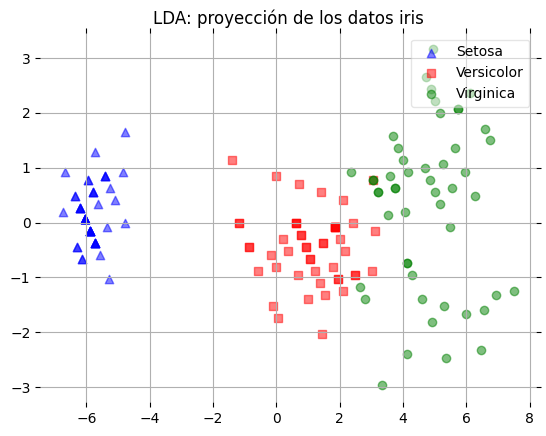

In [22]:
X_lda = lda.transform(X_sc)
plot_data(X_lda, "LDA: proyección de los datos iris")

In [23]:
y_pred = lda.predict(X_sc)

np.sum(y != y_pred)

6

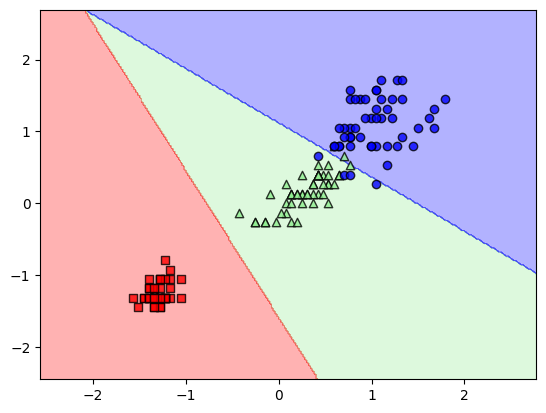

In [24]:
from modules.funciones_auxiliares import plot_decision_regions

plot_decision_regions(X_sc, y, lda)